WS 25/26
# WP5: Neural Computation

Thomas Wachtler  
*CNS, Faculty of Biology, LMU Munich*

## Exercise 3

---

---
## 1. The Gabor Filter Model ##

A model for the Simple Cell receptive field is the two-dimensional Gabor Filter,
which is constructed as the product of a sinewave grating with a two-dimensional Gaussian,

$$G(x,y) = \frac{1}{2 \pi \sigma_x \sigma_y} e^{-\frac{x^2}{2 \sigma_x^2}-\frac{y^2}{2 \sigma_y^2}} \cos(kx - \varphi)$$

where $k = \frac{2 \pi}{\lambda}$ is the spatial frequency, $\lambda$ the wavelength (period) of the cosine.

**a)**
The equation above describes a filter with orientation preference perpendicular to the x axis (i.e., vertical).
How would you change the equation to get a preferred orientation of 45 degrees?

**Answer:**
To get an equation of $45$ degrees, we rotate the axis, thus we get
$$
x \to \frac{x-y}{\sqrt{ 2 }}
$$ Thus, we have
$$
G(x,y) = \frac{1}{2 \pi \sigma_x \sigma_y} e^{-\frac{x^2}{2 \sigma_x^2}-\frac{y^2}{2 \sigma_y^2}} \cos(k \frac{x-y}{\sqrt{ 2 }}  - \varphi)
$$



### 1.1. One-dimensional Gabor ###

**b)**
We consider the one-dimensional case, i.e., let $y=0$, $\sigma_y=1$ in the above equation.

Plot $G(x)$ for different values of $\sigma_x$, $\lambda$, and $\varphi$ to understand the contribution
of these parameters to the filter structure.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

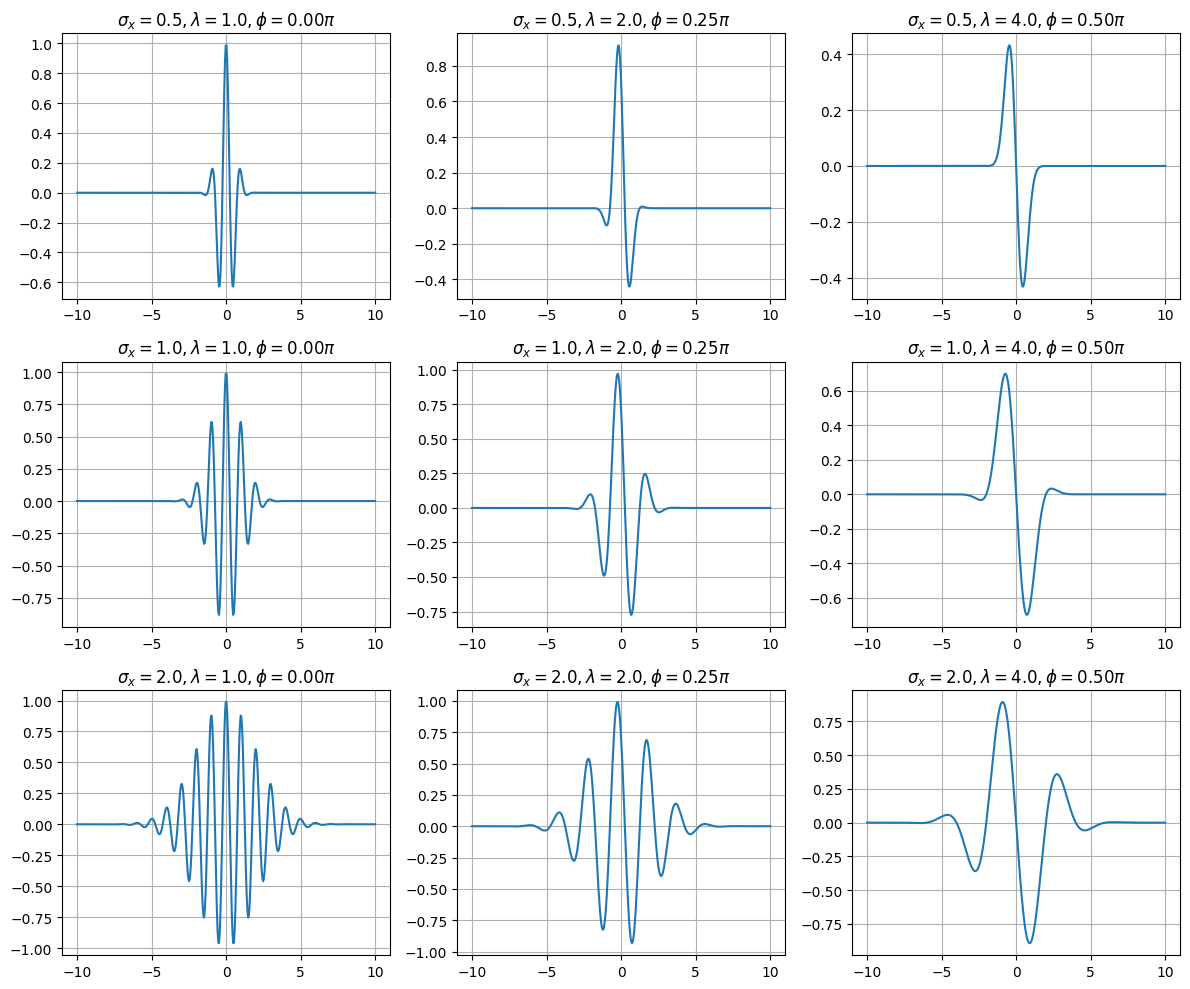

In [2]:
def G(x, sigma_x, lambda_, phi):
    """ Gabor function

    Parameters
    ----------
    x : array_like
        Input values.
    sigma_x : float
        Standard deviation of the Gaussian envelope.
    lambda_ : float
        Wavelength of the sinusoidal factor.
    phi : float
        Phase offset of the sinusoidal factor.

    Returns
    -------
    gabor : array_like
        Values of the Gabor function at input x.
    """
    gaussian_envelope = np.exp(-x**2 / (2 * sigma_x**2))
    sinusoidal_factor = np.cos(2 * np.pi * x / lambda_ + phi)
    gabor = gaussian_envelope * sinusoidal_factor
    return gabor

# Plot for different sigma_x, lambda_, and phi as 3x3 subplots 
sigma_x_values = [0.5, 1.0, 2.0]
lambda_values = [1.0, 2.0, 4.0]
phi_values = [0, np.pi/4, np.pi/2]
x = np.linspace(-10, 10, 400)
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
for i, sigma_x in enumerate(sigma_x_values):
    for j, lambda_ in enumerate(lambda_values):
        phi = phi_values[j]
        gabor_values = G(x, sigma_x, lambda_, phi)
        axes[i, j].plot(x, gabor_values)
        axes[i, j].set_title(f'$\\sigma_x={sigma_x}, \\lambda={lambda_}, \\phi={phi/np.pi:.2f} \\pi$')
        axes[i, j].grid()
plt.tight_layout()
plt.show()

**c)**
Find a parameter combination for which you get an even-symmetrical Gabor that
has a positive central peak, two negative side peaks, and negligible further peaks.

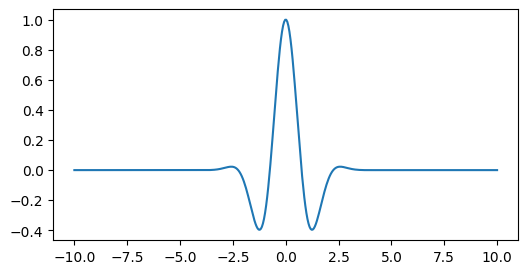

In [3]:
plt.figure(figsize=(6, 3))
plt.plot(x, G(x, 1.0, 3.0, 0), label='phi=0')
plt.show()

Modify to get an odd-symmetrical filter with otherwise equal parameters

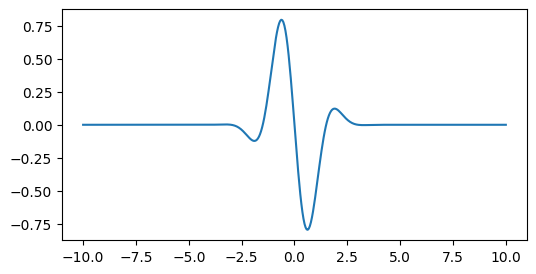

In [4]:
plt.figure(figsize=(6, 3))
plt.plot(x, G(x, 1.0, 3.0, np.pi/2), label='phi=0')
plt.show()

### 1.2. Two-dimensional Gabor ###

Now we consider the two-dimensional case, but to keep things simple we let $\sigma_x = \sigma_y = \sigma$.

**d)**
Plot the DoG filter that you used to filter the "munich.jpg" image in exercise 4.

Define four even-symmetrical Gabor filters with the properties described in **c)** and
spatial frequency such that the on-off structure approximately matches in size that of the DoG filter
and with four orientations (0, 45, 90, 135 degrees).

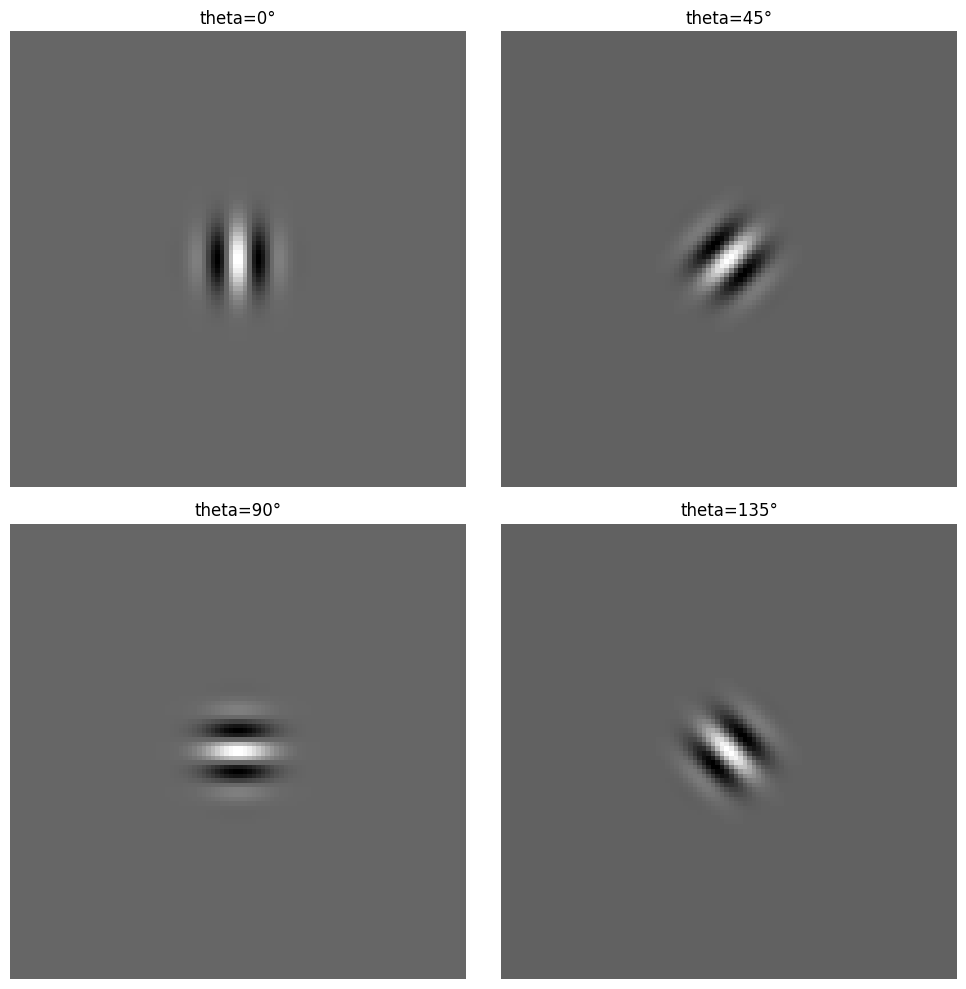

In [5]:
def G_2d(sigma_x, sigma_y, lambda_, phi, theta, size=100):
    """ 2D Gabor function

    Parameters
    ----------
    sigma_x : float
        Standard deviation of the Gaussian envelope in x direction.
    sigma_y : float
        Standard deviation of the Gaussian envelope in y direction.
    lambda_ : float
        Wavelength of the sinusoidal factor.
    phi : float
        Phase offset of the sinusoidal factor.
    theta : float
        Orientation of the Gabor function in radians.
    size : int
        Size of the output 2D array.

    Returns
    -------
    gabor_2d : array_like
        2D array representing the Gabor function.
    """
    x = np.linspace(-size // 2, size // 2, size)
    y = np.linspace(-size // 2, size // 2, size)
    X, Y = np.meshgrid(x, y)

    # Rotate coordinates
    X_theta = X * np.cos(theta) + Y * np.sin(theta)
    Y_theta = -X * np.sin(theta) + Y * np.cos(theta)

    gaussian_envelope = np.exp(-0.5 * ((X_theta**2 / sigma_x**2) + (Y_theta**2 / sigma_y**2)))
    sinusoidal_factor = np.cos(2 * np.pi * X_theta / lambda_ + phi)
    gabor_2d = gaussian_envelope * sinusoidal_factor
    return gabor_2d

# make 4 subplots for 4 theta values
theta_values = [0, np.pi/4, np.pi/2, 3*np.pi/4]
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()
for i, theta in enumerate(theta_values):
    gabor_2d = G_2d(5.0, 5.0, 10.0, 0, theta, size=100)
    axes[i].imshow(gabor_2d, cmap='gray')
    axes[i].set_title(f'theta={theta*180/np.pi:.0f}°')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

**e)**
Convolve the "munich.jpg" image with each of the filters.
Plot the results side by side. Describe.

c:\ProgramData\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


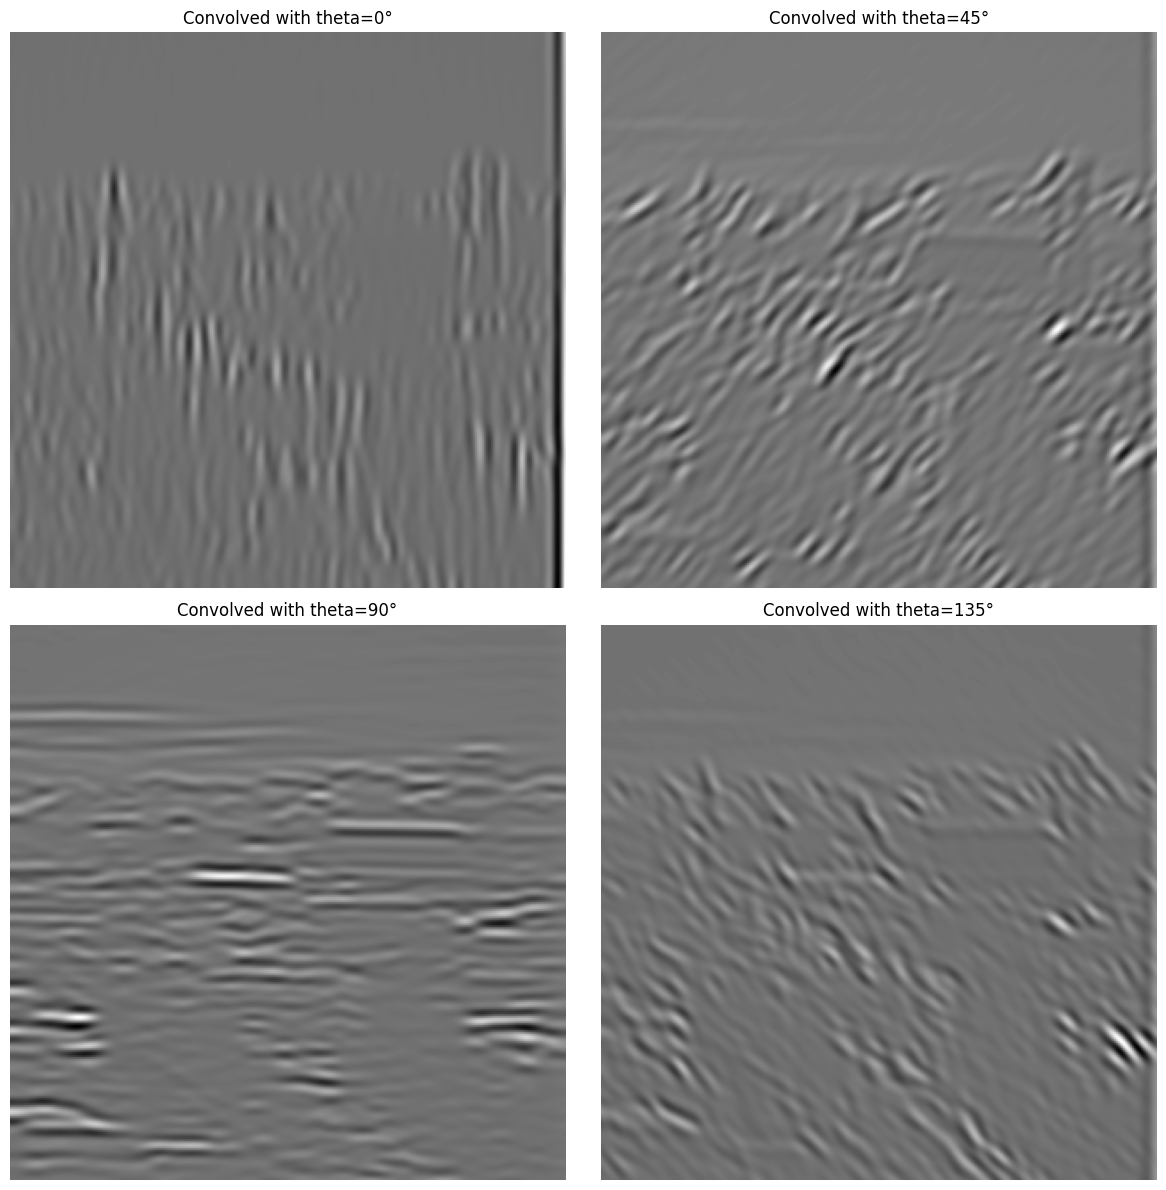

In [6]:
# Convolve 'munich.jpg' with each theta of the 2D Gabor function and display results
from scipy.ndimage import convolve
from skimage import io, color

image = io.imread('munich.jpg')
gray_image = color.rgb2gray(image)
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.ravel()
for i, theta in enumerate(theta_values):
    gabor_2d = G_2d(5.0, 5.0, 10.0, 0, theta, size=31)
    convolved_image = convolve(gray_image, gabor_2d)
    axes[i].imshow(convolved_image, cmap='gray')
    axes[i].set_title(f'Convolved with theta={theta*180/np.pi:.0f}°')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

### 1.3. Complex Cells ###

**f)** Set up a one-dimensional model complex cell as quadrature pair of one-dimensional Gabor filters with spatial frequency 0.1 and width (standard deviation of the Gaussian) $\sigma = 3$.


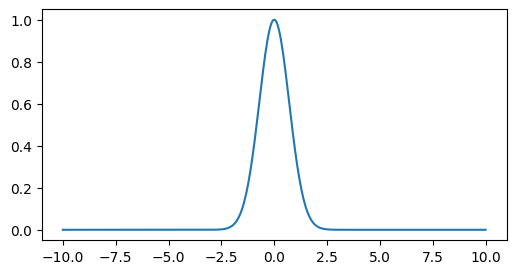

In [7]:
def G_x_complex_cell(x, sigma, lambda_, phi):
    return G(x, sigma, lambda_, phi)**2 + G(x, sigma, lambda_, phi + np.pi/2)**2

plt.figure(figsize=(6, 3))
plt.plot(x, G_x_complex_cell(x, 1.0, 3.0, 0), label='Complex Cell Response')
plt.show()

**g)** 
Generate a drifting sinewave stimulus and calculate the time course of the response of the complex cell.

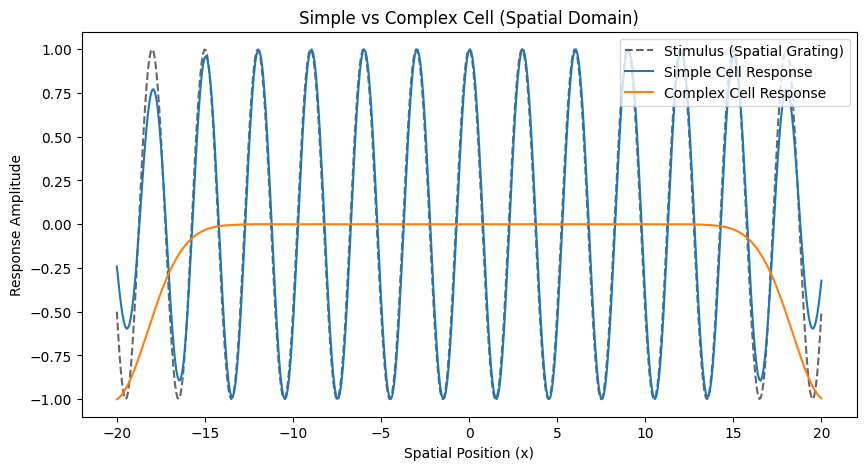

In [30]:
# --- Spatial axis ---
x = np.linspace(-20, 20, 500)
sigma = 3
lam = 3  # corresponds to spatial frequency of 0.1 cycles/unit

# --- Input stimulus: sine grating ---
stimulus = np.cos(2 * np.pi * x / lam)

# --- Compute responses ---
simple_response = np.convolve(stimulus, G(x, sigma, lam, 0), mode='same')
complex_response = np.convolve(stimulus, G_x_complex_cell(x, sigma, lam, 0), mode='same')
# normalize 
simple_response /= np.max(np.abs(simple_response))
complex_response /= np.max(np.abs(complex_response))
# --- Plot ---
plt.figure(figsize=(10,5))
plt.plot(x, stimulus, 'k--', label='Stimulus (Spatial Grating)', alpha=0.6)
plt.plot(x, simple_response, label='Simple Cell Response')
plt.plot(x, complex_response, label='Complex Cell Response')
plt.xlabel('Spatial Position (x)')
plt.ylabel('Response Amplitude')
plt.legend()
plt.title('Simple vs Complex Cell (Spatial Domain)')
plt.show()

**h)** 
Use different spatial frequencies for the stimulus and determine the contrast transfer function of the complex cell.

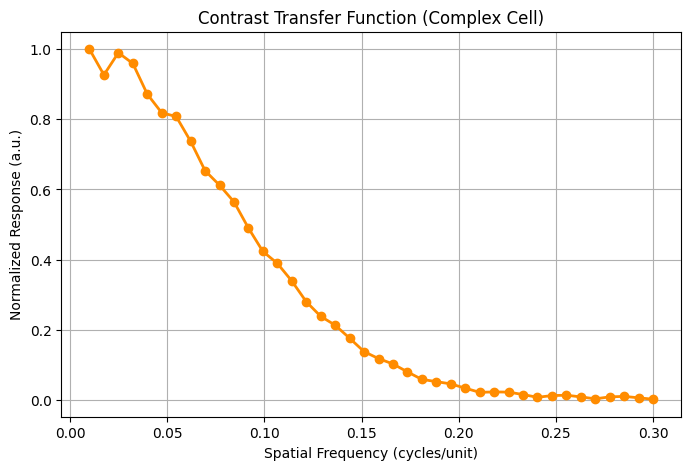

In [37]:
# --- Parameters ---
x = np.linspace(-50, 50, 2000)  # spatial axis
sigma = 3
spatial_freqs = np.linspace(0.01, 0.3, 40)  # spatial frequencies (cycles/unit)

responses = []

# --- Compute responses for each spatial frequency ---
for f in spatial_freqs:
    lam = 1.0 / f  # wavelength
    stimulus = np.cos(2 * np.pi * f * x)  # sinusoidal grating stimulus
    # use your G_x_complex_cell
    filt = G_x_complex_cell(x, sigma, lam, 0)
    response = np.convolve(stimulus, filt, mode='same')
    responses.append(np.mean(np.abs(response)))  # take mean magnitude as amplitude

responses = np.array(responses)
ctf = responses / responses.max()  # normalize to get contrast transfer function

# --- Plot CTF ---
plt.figure(figsize=(8, 5))
plt.plot(spatial_freqs, ctf, '-o', color='darkorange', lw=2)
plt.xlabel('Spatial Frequency (cycles/unit)')
plt.ylabel('Normalized Response (a.u.)')
plt.title('Contrast Transfer Function (Complex Cell)')
plt.grid(True)
plt.show()

**i)** 
Change the width of the Gaussian to 2 and compare the resulting contrast transfer function to the previous one.

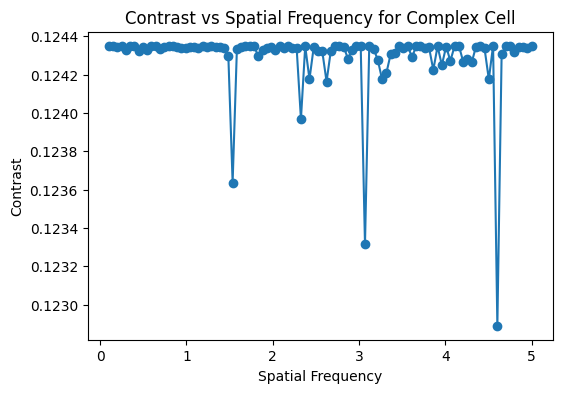

In [10]:
def contrast_function(response):
    return (np.max(response) - np.min(response)) / (np.max(response) + np.min(response))

plt.figure(figsize=(6, 4))
contrasts = []
spatial_frequencies = np.linspace(0.1, 5.0, 100)  # Example spatial frequencies
for sf in spatial_frequencies:
    response = G_x_complex_cell(np.cos(2 * np.pi * x * sf), 2.0, 1, 0)
    contrasts.append(contrast_function(response))

plt.plot(spatial_frequencies, contrasts, marker='o')
plt.xlabel('Spatial Frequency')
plt.ylabel('Contrast')
plt.title('Contrast vs Spatial Frequency for Complex Cell')
plt.show()

---

## 2. Parseval Theorem

Show that the total energy (integral of the squared signal) of a time signal is equal to the energy of its spectrum:

$$ \int |s(t)|^2 dt = \int |S(f)|^2 df $$

(For simplicity, assume that both $s$ and $S$ are real-valued.)

**Ans** <br>
Using Fourier transform, we have defined $S(f)=\int s(t) \exp(-2\pi ft i) \, dt$ 
Now, to get the power of $S(f)$, we multiple it with its conjugate and integrate it:
$$
\int S^*(f)S(f)  \, df = \int \left(    \int   [s(t')\exp(-2\pi fit')dt'] \int [s^*(t) \exp(2\pi fit)\, dt]  \right)  df  
$$
$$
\int |S(f)|^2  \, df = \int s(t') \,dt' \int s^*(t) dt \int \exp(2\pi if(t-t')) \, df 
$$
$$
\int |S(f)|^2  \, df = \int s(t') \,dt' \int s^*(t) dt \delta(t-t')
$$
$$
\int |S(f)|^2  \, df = \int s(t') \,dt'  s^*(t')
$$
$$
\int |S(f)|^2  \, df = \int |s(t)|^2dt
$$
$$
Q.E.D.
$$




----

## 3. Autorcorrelation, Crosscorrelation

The figure below shows a typical result from a series of studies on cat visual cortex published some thirty years ago (the reference will be given in the solutions). (A) shows averaged responses (PSTHs) of two neurons to a moving bar stimulus. (B) shows the autocorrelograms of the two responses. From these autocorrelograms, what can you say about the firing behavior of the neurons?

<div>
<img src="attachment:acorr.png" width=75%/>
</div>


Below is the remainder of this figure, which shows the cross-correlogram of the responses (C) and the cross-correlogram after shuffliing the trials (D). What does the cross-correlogram indicate? What does it mean that the cross-correlogram of the shuffeled responses is flat? 

<div>
<img src="attachment:ccorr.png" width=75%/>
</div>


---

## 4. Spike-Triggered Average

This exercise is from Dayan & Abbott Theoretical Neuroscience, chapter 1, exercise 8.
Load the file `H1data.mat`, which contains data from a fly H1 neuron responding to an approximate white-noise visual motion stimulus. Data were collected for 20 minutes at a sampling rate of 500Hz. In the file, `rho` is a vector that gives the sequence of spiking events or nonevents at the sampled times (every 2 ms). When an element of `rho` is one, this indicates the presence of a spike at the corresponding time, whereas a zero value indicates no spike. The variable `stim` gives the sequence of stimulus values at the sampled times. Calculate and plot the spike-triggered average from these data over the range from 0 to 300 ms (150 time steps).

In [27]:
# import matlab .mat file 
import scipy.io
data = scipy.io.loadmat('H1data.mat')
print(data.keys())
rho = np.array(data['rho'])[:,0]
stim = np.array(data['stim'])[:,0]
window_size = 150

dict_keys(['__header__', '__version__', '__globals__', 'rho', 'stim'])


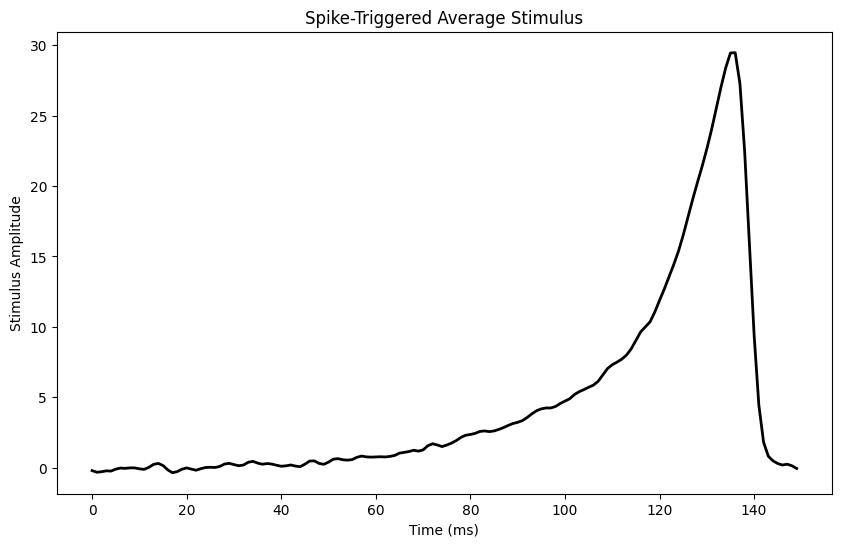

In [35]:
spike_indices = np.where(rho == 1)[0]
spike_triggering_stimuli = []

plt.figure(figsize=(10, 6))
for i, idx in enumerate(spike_indices):
    if idx < window_size:
        continue  # Skip if there isn't enough preceding stimulus
    
    segment = stim[idx - window_size: idx]
    spike_triggering_stimuli.append(segment)

plt.plot(np.array(spike_triggering_stimuli).mean(axis=0), color='black', linewidth=2, label='Mean Stimulus')
plt.title('Spike-Triggered Average Stimulus')
plt.xlabel('Time (ms)')
plt.ylabel('Stimulus Amplitude')
plt.show()
